## 03_Regression_WithOutlier_WithScaling.ipynb

- This notebook includes:

- ✅ Outlier treatment (IQR method)

- ✅ Feature scaling (StandardScaler) - only x

- ✅ Model training & evaluation

- ✅ Notes highlighting which models benefit most from scaling

- ✅ Interpretability metrics and guidelines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import statsmodels.api as sm  #OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load Dataset
df = pd.read_csv(r'C:\Users\USER\Documents\Python\Nareshit data analysis\stats and ML\ML\26th- mlr\MLR\House_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Basic Info and Nulls
df.info()

# Check for nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Assuming last column is target (DV) for this dataset
df.drop(columns=['id','date'],axis=1,inplace=True)

In [5]:
# IQR method to detect and remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

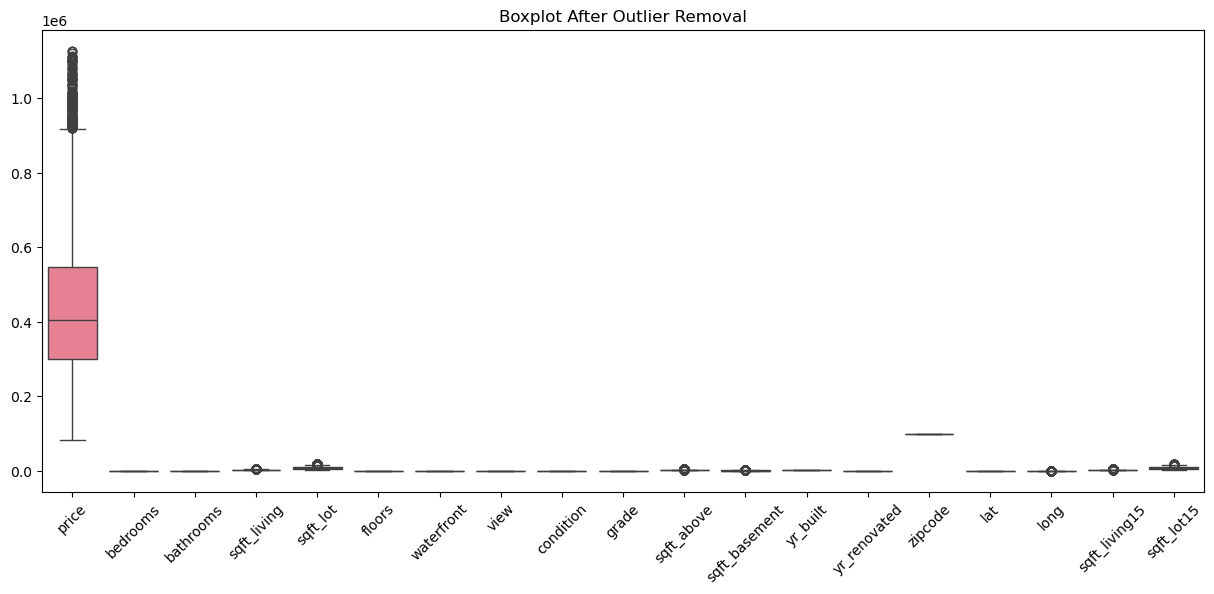

In [6]:

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_iqr.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Removal")
plt.show()


In [7]:

X = df_iqr.drop("price", axis=1)  # Replace with your actual DV
y = df_iqr["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Note:

- Use StandardScaler (mean=0, std=1) for distance-based models.

- X_train_scaled, X_test_scaled will be used only in models that need it.

In [10]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

results = {}

# Models that need scaled data
scaled_models = ['SVR', 'KNN', 'Lasso', 'Ridge', 'ElasticNet']

for name, model in models.items():
    if name in scaled_models:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        bias = model.score(X_train_scaled, y_train)
        variance = model.score(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        bias = model.score(X_train, y_train)
        variance = model.score(X_test, y_test)

    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Bias Score': bias,
        'Variance Score': variance
    }

result_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)
display(result_df)

,R2,RMSE,MAE,Bias Score,Variance Score
RandomForest,0.864104,66707.420907,45683.403152,0.979212,0.864104
KNN,0.748826,90689.818421,62708.050151,0.845072,0.748826
DecisionTree,0.737740,92669.593107,64413.281553,0.996831,0.737740
LinearRegression,0.656014,106130.864971,79065.265835,0.653791,0.656014
Lasso,0.656013,106131.000440,79065.379550,0.653791,0.656013
Ridge,0.656012,106131.074900,79064.956034,0.653791,0.656012
ElasticNet,0.598722,114628.841196,85700.822218,0.602763,0.598722
SVR,-0.034455,184046.193060,141763.842844,-0.031192,-0.034455


### 📊 Feature Scaling & Model Performance

| Model         | Scaling Required | Reason                                    |
|---------------|------------------|-------------------------------------------|
| LinearRegression | ❌              | Coefficients not affected by magnitude     |
| Lasso          | ✅              | Regularization sensitive to feature scale |
| Ridge          | ✅              | Same as Lasso                             |
| ElasticNet     | ✅              | Same as above                             |
| KNN            | ✅✅             | Distance-based; scaling critical          |
| SVR            | ✅✅             | Kernel & margin depend on scale           |
| DecisionTree   | ❌              | Tree splits not impacted by scale         |
| RandomForest   | ❌              | Ensemble of trees, scaling not needed     |

---

### 📌 What You Should Observe:

- **SVR & KNN** often show **significant performance boost** after scaling.
- **Lasso/Ridge/ElasticNet** also improve due to fair coefficient penalization.
- **LinearRegression, Tree-based models** remain relatively unaffected.

---

### ✅ Metric Interpretation

| Metric | Goal | Notes |
|--------|------|-------|
| R²     | Closer to 1 is better | Indicates fit to actual values |
| RMSE   | Lower is better       | Penalizes larger errors        |
| MAE    | Lower is better       | Average magnitude of errors    |
| Bias Score | Not too close to 1 | If > 0.95 and variance low → Overfitting |
| Variance Score | Should be reasonably close to bias | Indicates generalization |


## 📦 1. Random Forest Regressor Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],  # 🌲 Number of trees
    'max_depth': [5, 10, 15],  # 🧠 Depth of each tree
    'min_samples_split': [2, 5, 10],  # 📉 Min samples to split a node
    'min_samples_leaf': [1, 3, 5],  # 🍃 Min samples at leaf node
    'max_features': ['sqrt', 'log2', 0.3]  # 🎯 Features to consider per split
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


## ✅ AFTER HYPERPARAMETER TUNING — NEXT STEPS TO FINALIZE MODEL


In [17]:
#a. Predictions
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)

In [19]:
#b. Performance Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
bias = best_model.score(X_train, y_train)
variance = best_model.score(X_test, y_test)
print(f"R2: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, Bias score: {bias:.2f}, variance score: {variance:.2f}")


R2: 0.8593, RMSE: 67885.71, MAE: 46080.48, Bias score: 0.96, variance score: 0.86


In [20]:
# c. Predicted vs Actual Table
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Error": y_test - y_pred
})
print(comparison.head())


         Actual      Predicted         Error
5857   172000.0  256095.490083 -84095.490083
7484   330000.0  304469.494363  25530.505637
5090   355000.0  330057.985378  24942.014622
6987   515000.0  554966.965174 -39966.965174
14496  402000.0  480148.952363 -78148.952363


## ✅ 3. Visualizations
You did this earlier — do it again for final tuned model:

- 🔹 Actual vs Predicted scatterplot

- 🔹 Residual plot

- 🔹 Error distribution (histogram)

- 🔹 Feature importances (for RandomForest, DecisionTree, etc.)

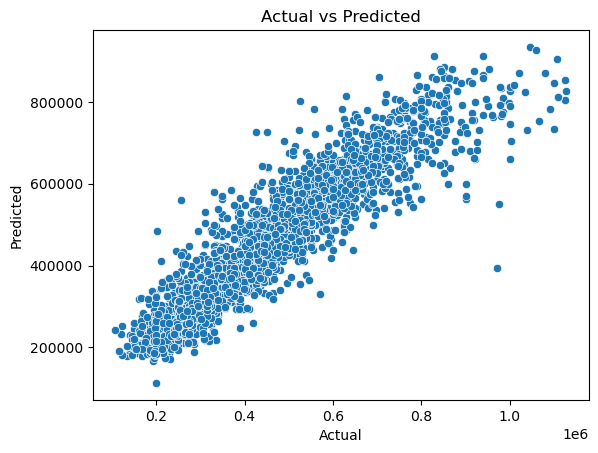

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


In [22]:
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print("Bias (Train R²):", train_score)
print("Variance (Test R²):", test_score)


Bias (Train R²): 0.9622469640729752
Variance (Test R²): 0.8592610160168273


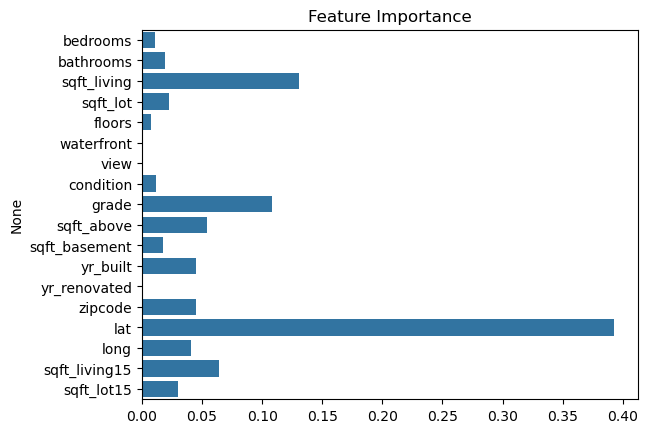

In [23]:
importances = best_model.feature_importances_
features = X_train.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


## *************************** RandomizedSearchCV *********************************

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# ------------------ Step 1: Define Parameter Grid ------------------ #
param_dist = {
    'n_estimators': [50, 100, 200, 300],          # Number of trees
    'max_depth': [None, 10, 20, 30],              # Max depth of each tree
    'min_samples_split': [2, 5, 10],              # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Min samples at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']      # Features to consider when looking for best split
}

In [26]:
# ------------------ Step 2: RandomizedSearchCV ------------------ #
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # Try 20 random combinations
    cv=5,                   # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='r2', verbose=2)

In [27]:
# ------------------ Step 3: Best Model ------------------ #
best_model = random_search.best_estimator_
print("🔍 Best Parameters:\n", random_search.best_params_)

🔍 Best Parameters:
 {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [ ]:
# ------------------ Step 4: Save Best Model ------------------ #
joblib.dump(best_model, 'best_random_forest_model.pkl')

In [28]:
# ------------------ Step 5: Predict ------------------ #
y_pred = best_model.predict(X_test)

# ------------------ Step 6: Evaluate ------------------ #
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
bias = best_model.score(X_train, y_train)
variance = best_model.score(X_test, y_test)

print(f"\n📊 Performance:")
print(f"R² Score      : {r2:.4f}")
print(f"RMSE          : {rmse:.2f}")
print(f"MAE           : {mae:.2f}")
print(f"Bias (Train R²): {bias:.4f}")
print(f"Variance (Test R²): {variance:.4f}")


📊 Performance:
R² Score      : 0.8564
RMSE          : 68581.72
MAE           : 46564.66
Bias (Train R²): 0.9786
Variance (Test R²): 0.8564


In [29]:
# ------------------ Step 7: Actual vs Predicted Table ------------------ #
comparison_df = pd.DataFrame({
    'Actual': y_test.values.ravel(),
    'Predicted': y_pred,
    'Error': y_test.values.ravel() - y_pred,
    'Absolute Error': np.abs(y_test.values.ravel() - y_pred)
})
print("\n🧾 Prediction Comparison:")
print(comparison_df.head())


🧾 Prediction Comparison:
     Actual      Predicted         Error  Absolute Error
0  172000.0  271055.076667 -99055.076667    99055.076667
1  330000.0  293963.556667  36036.443333    36036.443333
2  355000.0  328395.090000  26604.910000    26604.910000
3  515000.0  568824.349206 -53824.349206    53824.349206
4  402000.0  470740.420000 -68740.420000    68740.420000


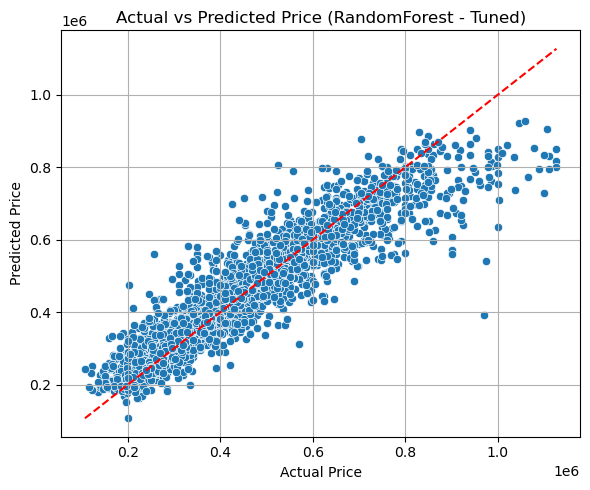

In [30]:
# ------------------ Step 8: Visualizations ------------------ #

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (RandomForest - Tuned)")
plt.grid(True)
plt.tight_layout()
plt.show()

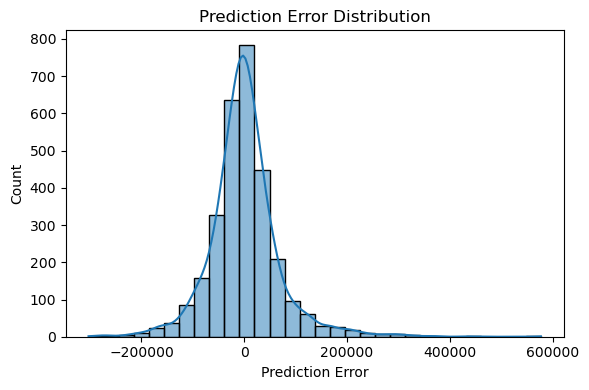

In [31]:
# Histogram: Error Distribution
plt.figure(figsize=(6, 4))
sns.histplot(comparison_df['Error'], bins=30, kde=True)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

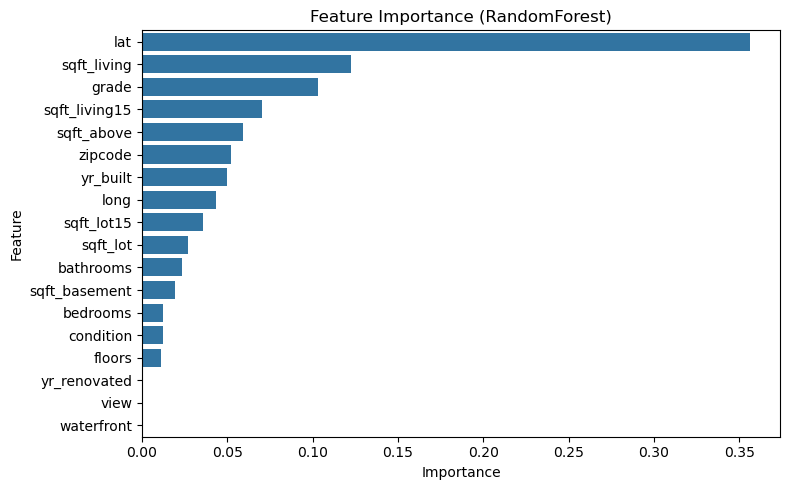

In [32]:
# Barplot: Feature Importances
feature_importances = best_model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.show()

Step	Description

param_dist	Hyperparameters and possible values for RandomForest

RandomizedSearchCV	Tries 20 combinations with 5-fold cross-validation

best_model	The RandomForestRegressor with the best settings

.score(X, y)	Gives R² score — used as Bias (Train) and Variance (Test) here

joblib.dump()	Saves the model so you can load it later

Visuals	Help detect overfitting, underfitting, or weird prediction behavior

## ✅ 1. Check & Save the Best Model(s)

In [ ]:
import joblib
joblib.dump(best_model, "best_randomforest_model.pkl")

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'best_model.pkl')


## ✅ Notes on Parameters:

- n_estimators: More trees = better performance, up to a point.

- max_depth: Prevents trees from growing too deep and overfitting.

- min_samples_split: Bigger value → less complex trees.

- min_samples_leaf: Prevents tiny leaf nodes (common source of overfit).

- max_features: Reduces greedy splits → better generalization.

## 📦 2. KNN Regressor Tuning

In [ ]:
knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # 👥 Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # 📏 Use equal or distance-based weights
    'p': [1, 2]  # 🧮 Distance metric (1=Manhattan, 2=Euclidean)
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_


## ✅ Notes:

- n_neighbors: Low = sensitive to noise; High = smoother predictions.

- weights='distance': Nearby points matter more.

- p=1 or 2: L1 or L2 distance.

## 📦 3. SVR (Support Vector Regression) Tuning

In [ ]:
svr = SVR()

param_grid_svr = {
    'C': [0.1, 1, 10],  # 💪 Regularization (penalty for error)
    'epsilon': [0.1, 0.2, 0.5],  # 🚫 Margin of tolerance
    'kernel': ['linear', 'rbf']  # 🔀 Type of decision function
}

grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(X_train_scaled, y_train.values.ravel())  # SVR needs scaled data

best_svr = grid_svr.best_estimator_


## ✅ Notes:

- C: Higher = less tolerant to error → more overfitting.

- epsilon: Wider margins = more flexibility.

- kernel: 'rbf' works better for non-linear data.

## 📦 4. Ridge / Lasso / ElasticNet (Linear Models with Regularization)

In [ ]:
# Ridge
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}  # Regularization strength
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_ridge.best_estimator_

# Lasso
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0]}  # Stronger penalty shrinks more features
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_lasso.best_estimator_

# ElasticNet
param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.2, 0.5, 0.8]  # Mix between Lasso and Ridge
}
grid_elastic = GridSearchCV(ElasticNet(), param_grid_elastic, cv=5, scoring='r2')
grid_elastic.fit(X_train_scaled, y_train)
best_elastic = grid_elastic.best_estimator_
